In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

In [2]:
x_train = pd.read_csv('c:/Users/nishant/Stock Price Prediction/Train/x_train.csv')
y_train = pd.read_csv('c:/Users/nishant/Stock Price Prediction/Train/y_train.csv')

In [4]:
print(x_train.shape)
print(y_train.shape)

(1257, 1)
(1257, 1)


In [5]:
x_train

,High
0,332.83
1,333.87
2,330.75
3,328.77
4,322.29
...,...
1252,793.32
1253,792.74
1254,797.86
1255,794.23


In [6]:
y_train

,High
0,333.87
1,330.75
2,328.77
3,322.29
4,315.72
...,...
1252,792.74
1253,797.86
1254,794.23
1255,785.93


<AxesSubplot:>

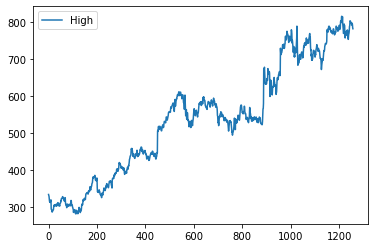

In [7]:
y_train.plot()

<AxesSubplot:>

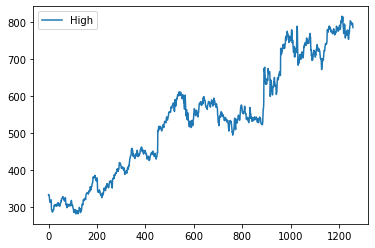

In [8]:
x_train.plot()

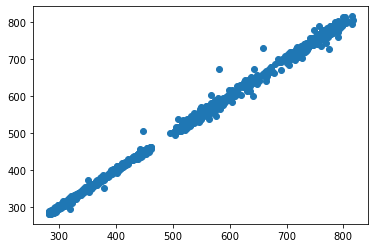

In [11]:
plt.scatter(x_train.values,y_train.values)
plt.show()

In [13]:
SPLIT = 0.2
x_val = x_train[int((1-SPLIT)*len(x_train)):]
y_val = y_train[int((1-SPLIT)*len(y_train)):]
x_train = x_train[:int((1-SPLIT)*len(x_train))]
y_train = y_train[:int((1-SPLIT)*len(y_train))]

In [15]:
print(x_val.shape,y_val.shape)
print(x_train.shape,y_train.shape)

(252, 1) (252, 1)
(1005, 1) (1005, 1)


In [16]:
 reg = LinearRegression()

In [17]:
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
print(reg.score(x_train,y_train))
print(reg.score(x_val,y_val))

0.9965230346542764
0.935325704163495


In [32]:
clf = Lasso(alpha=0.5)
clf.fit(x_train,y_train)

Lasso(alpha=0.5)

In [33]:
print(clf.score(x_train,y_train))
print(clf.score(x_val,y_val))

0.9965230335301009
0.9353344753656703


In [34]:
test = pd.read_csv('c:/Users/nishant/Stock Price Prediction/Test/x_test.csv')

In [41]:
pred = reg.predict(test.values)
pred = pd.DataFrame(pred,columns=['High'])
pred.to_csv('submission.csv',index=False)

In [40]:
pred

,High
0,790.112645
1,791.822915
2,794.963411
3,808.385529
4,810.455856
5,809.615723
6,808.635569
7,807.875449
8,811.706053
9,807.625409


In [38]:
test

,High
0,789.63
1,791.34
2,794.48
3,807.90
4,809.97
5,809.13
6,808.15
7,807.39
8,811.22
9,807.14


## LSTM Model

In [3]:
from keras.models import Sequential
from keras.layers import *

In [23]:
x_train = pd.read_csv('c:/Users/nishant/Stock Price Prediction/Train/x_train.csv')
y_train = pd.read_csv('c:/Users/nishant/Stock Price Prediction/Train/y_train.csv')
test = pd.read_csv('c:/Users/nishant/Stock Price Prediction/Test/x_test.csv')

In [30]:
new_data = pd.concat([x_train,test],axis=0)

In [38]:
dataset = new_data.values

In [39]:
dataset

array([[332.83],
       [333.87],
       [330.75],
       ...,
       [838.  ],
       [841.95],
       [815.84]])

In [36]:
train = new_data[0:1257]
val = new_data[1257:]

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [50]:
x_train, y_train = [], []
for i in range(40,len(train)):
    x_train.append(scaled_data[i-40:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [54]:
print(x_train.shape)
print(y_train.shape)

(1217, 40)
(1217,)


In [55]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1217, 40, 1)


In [82]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 40, 64)            16896     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.fit(x_train,y_train ,epochs=2,batch_size=1)

Epoch 1/2
1217/1217 [==============================] - 14s 12ms/step - loss: 3.0421e-04
Epoch 2/2
1217/1217 [==============================] - 15s 12ms/step - loss: 3.1266e-04


In [129]:
inputs = new_data[len(new_data) - len(val) - 40:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [130]:
x_test = []
for i in range(40,inputs.shape[0]):
    x_test.append(inputs[i-40:i,0])
x_test = np.array(x_test)

In [131]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

In [132]:
rms=np.sqrt(np.mean(np.power((val-closing_price),2)))
rms

High    13.384725
dtype: float64

In [133]:
closing_price.shape

(19, 1)

In [134]:
df=pd.DataFrame(closing_price,columns=['High'])

In [135]:
df.to_csv('submission.csv',index=False)

In [136]:
df

,High
0,777.304871
1,783.793274
2,783.209229
3,786.927368
4,800.964783
5,798.857666
6,799.363708
7,798.555176
8,798.192139
9,802.715759


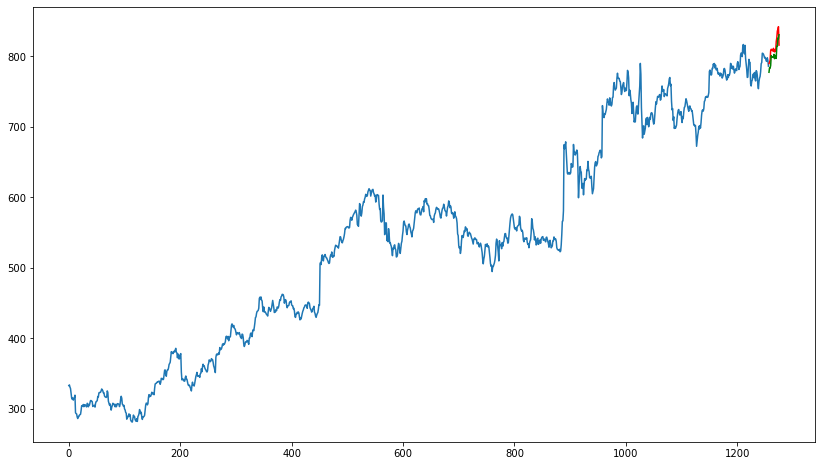

In [137]:
plt.figure(figsize=(14,8))
train = new_data[:1257]
valid = new_data[1257:]

plt.plot(train['High'])
plt.plot(np.arange(1257,1257+19),valid['High'],color='red')
plt.plot(np.arange(1257,1257+19),closing_price,color='green')
plt.show()